# Player Position Prediction from FIFA 19 dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("E:\\IN\\Level 1\\data.csv")
data.head(20)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [6]:
# Data Description 
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


We can see from the data description, the count from the _Internation Reputation_ column to the _44th_ column is less than the first 6 columns _(18207 -> 18159)_
There is possibility of nan values

In [15]:
data['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

For prediciting the player position we can see that label for player's current positions are already present inside the given data. For simplifying the task, I will change these positions into the 4 general positions that the players play in football 
- Forward
- Midfielder
- Defense
- Goalkeeper

In [17]:
import re
def pos(s):
    if re.findall("F$",s) or re.findall("T$",s) or re.findall("S$",s) or re.findall("W$",s):
        return 1   #Forward Player
    elif re.findall("M$",s):
        return 2   #Midfielder
    elif re.findall("B$",s):
        return 3   #Defense Player
    elif s=="GK":
        return 4   #GoalKeeper
    return 0       #In case, no value is present in data for prediction
data['General Position']=pd.Series(list(map(pos,
                        data['Position'].astype(str).tolist())))
data['General Position'].head(10)

0    1
1    1
2    1
3    4
4    2
5    1
6    2
7    1
8    3
9    4
Name: General Position, dtype: int64

We can determine the player position from his play statistics (Short Pass, Finishin, etc.)
All of these statistics are on the same scale of out of 100
## Following is the Corelation Heatmap for visualising the effects of these statistics

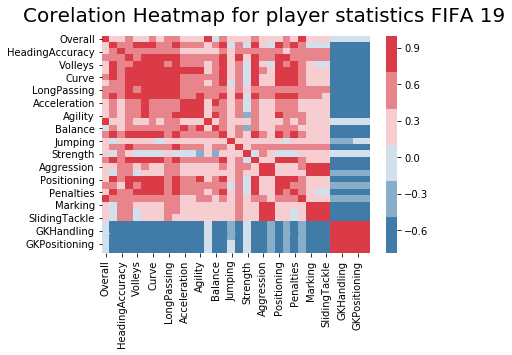

In [22]:
fig=plt.figure()
fig.suptitle('Corelation Heatmap for player statistics FIFA 19',fontsize=20)
ax = sns.heatmap(data[['Overall','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle','GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), cmap=sns.diverging_palette(240, 10))

So, its clear that Goalkeeping statistics have really less corelation with the rest of the statistics, and statistics like Long passing and volleys have high corelation with similar statistics like acceleration, ball control, which can be essential for a forward or midfielder

In [25]:
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.neighbors import KNeighborsClassifier as knn_c
l=['Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle','GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
X=data[l].fillna(0.0)
y=data['General Position']
X.head(15)

,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
6,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
7,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
8,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
9,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,...,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0


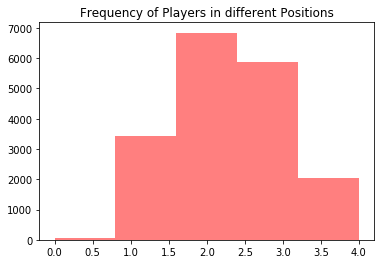

In [73]:
plt.figure()
plt.hist(y,5, facecolor='red',alpha=0.5)
plt.title('Frequency of Players in different Positions')
plt.show()

The columns mentioned in the above list must be essential in training the classifier to correctly predict the player in the above said class of player

Lets take a look at the label data. Here 
- 1 is Forward Player
- 2 is Midfielder
- 3 is Defense Player
- 4 is Goalkeeper
- 0 is if there is no value for the player to be classified

In [28]:
print(y.unique())
y.head(15)

[1 4 2 3 0]


0     1
1     1
2     1
3     4
4     2
5     1
6     2
7     1
8     3
9     4
10    1
11    2
12    3
13    2
14    2
Name: General Position, dtype: int64

Lets split the data now -

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

Since the problem in hand is now a multi-class classification problem, we can look at algorithms like KNN, SVC

Here the input data is of high dimensions (33 attribute to consider), so **linear SVC** was the first choice to test 

### Testing with Linear SVM Classifier 

In [31]:
from sklearn.svm import SVC
import time
st=time.time()
svcc=SVC(kernel='linear')
svcc.fit(X_train,y_train)
print('SVC TEST SCORE')
print(svcc.score(X_test,y_test))
print('------------------')
print('SVC TRAINING SCORE')
print(svcc.score(X_train,y_train))
print("--- %s seconds ---" % (time.time() - st))

SVC TEST SCORE
0.8646748681898067
------------------
SVC TRAINING SCORE
0.8768216770413768
--- 225.70815992355347 seconds ---


Doesnt seem to overfit, training score still looks a bit low

### Now with Random Forst

In [35]:
from sklearn.ensemble import RandomForestClassifier
#model with 1000 decision trees
st=time.time()
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
print('Random Forest TEST SCORE')
print(rf.score(X_test,y_test))
print('------------------')
print('Random Forest TRAINING SCORE')
print(rf.score(X_train,y_train))
print("--- %s seconds ---" % (time.time() - st))

Random Forest TEST SCORE
0.8701669595782073
------------------
Random Forest TRAINING SCORE
1.0
--- 38.89694809913635 seconds ---


Does better job than SVC here, no signs of underfitting and overfitting here, in much less time

In [39]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X)
print('RF ACCURACY -')
print(accuracy_score(y,y_pred))
print('In comparision SVC accuracy is '+str(accuracy_score(y,svcc.predict(X))))

RF ACCURACY -
0.9675399571593343
In comparision SVC accuracy is 0.8737848080408634


#### Confusion Matrix with RF

In [74]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix (y,rf.predict(X)))

,0,1,2,3,4
0,57,2,0,0,1
1,0,3230,184,4,0
2,0,139,6557,142,0
3,0,1,118,5747,0
4,0,0,0,0,2025


In [84]:
def playerPositionPredictor(s):
    x=X.where(data['Name']==s).dropna()
    print(s+' is a')
    if svcc.predict(x) == 1: print('Forward Player')
    elif svcc.predict(x) == 2: print('Midfielder')
    elif svcc.predict(x) == 3: print('Defense Player')
    elif svcc.predict(x) == 4: print('Goalkeeper')
    else : print('None')
name=input('Enter Name ')
playerPositionPredictor(name)

Enter Name Neymar Jr
Neymar Jr is a
Forward Player
